In [1]:
cd ../../data

/Users/lise/memoire_tech/M2_HN/data


In [21]:
#Libraries classiques
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Librairies géomatiques
import geopy
from geopy import distance 
from geopy.distance import geodesic 
import geopandas
from scipy.stats import gaussian_kde

In [4]:
#Récupération des données
with open("gdf_prod.csv") as csv :
    gdf_places_prod = pd.read_csv(csv, sep="\t")
    
with open("gdf_find.csv") as csv :
    gdf_places_find = pd.read_csv(csv, sep="\t")
    
with open("textile_clean.csv") as csv :
    df_textile = pd.read_csv(csv, sep="\t")

<Axes: >

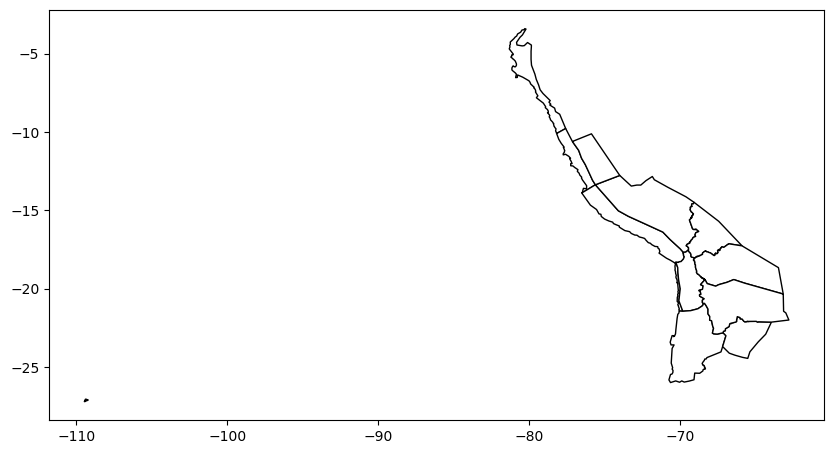

In [10]:
#Récupération des régions
gdf_region = geopandas.read_file("geo_data/WCP_region3.shp", crs=4326)
del gdf_region['id']

gdf_region["geometry"].plot(figsize=(10, 10), color = "white", edgecolor="black")

## Density maps
Source : https://scikit-learn.org/stable/auto_examples/neighbors/plot_species_kde.html#sphx-glr-auto-examples-neighbors-plot-species-kde-py

_Kernel density_ estimé ou observé.

#### Densité des lieux de production

In [12]:
#Création du dataframe à partir duquel on va travailler
gdf_places_prod['geometry'] = geopandas.points_from_xy(gdf_places_prod.lon, gdf_places_prod.lat)
gdf_places_prod['period'] = df_textile['period']
gdf_places_prod = geopandas.GeoDataFrame(gdf_places_prod)

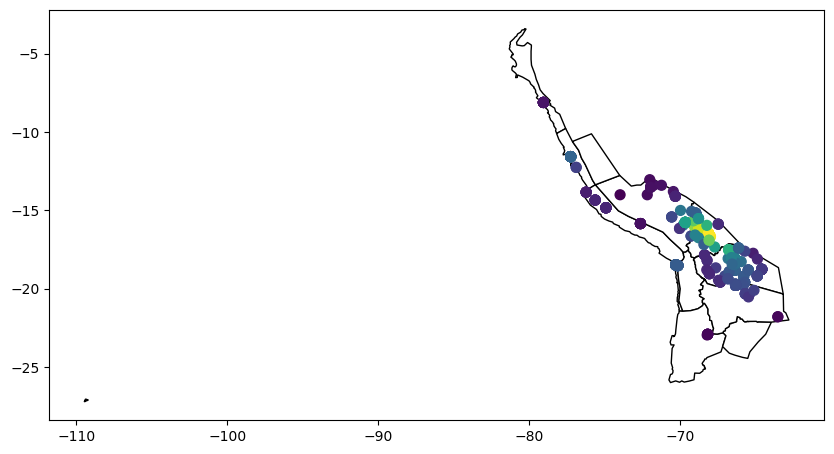

In [17]:
#Version synchronique
gdf_places_prod_temp = gdf_places_prod[gdf_places_prod['name'] != 'Rapa Nui']
x = gdf_places_prod_temp.lon
y = gdf_places_prod_temp.lat

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots(figsize = (10,10))
gdf_region["geometry"].to_crs(epsg=4326).plot(ax=ax, color = "white", edgecolor="black")
ax.scatter(x, y, c=z, s=50)

plt.show()

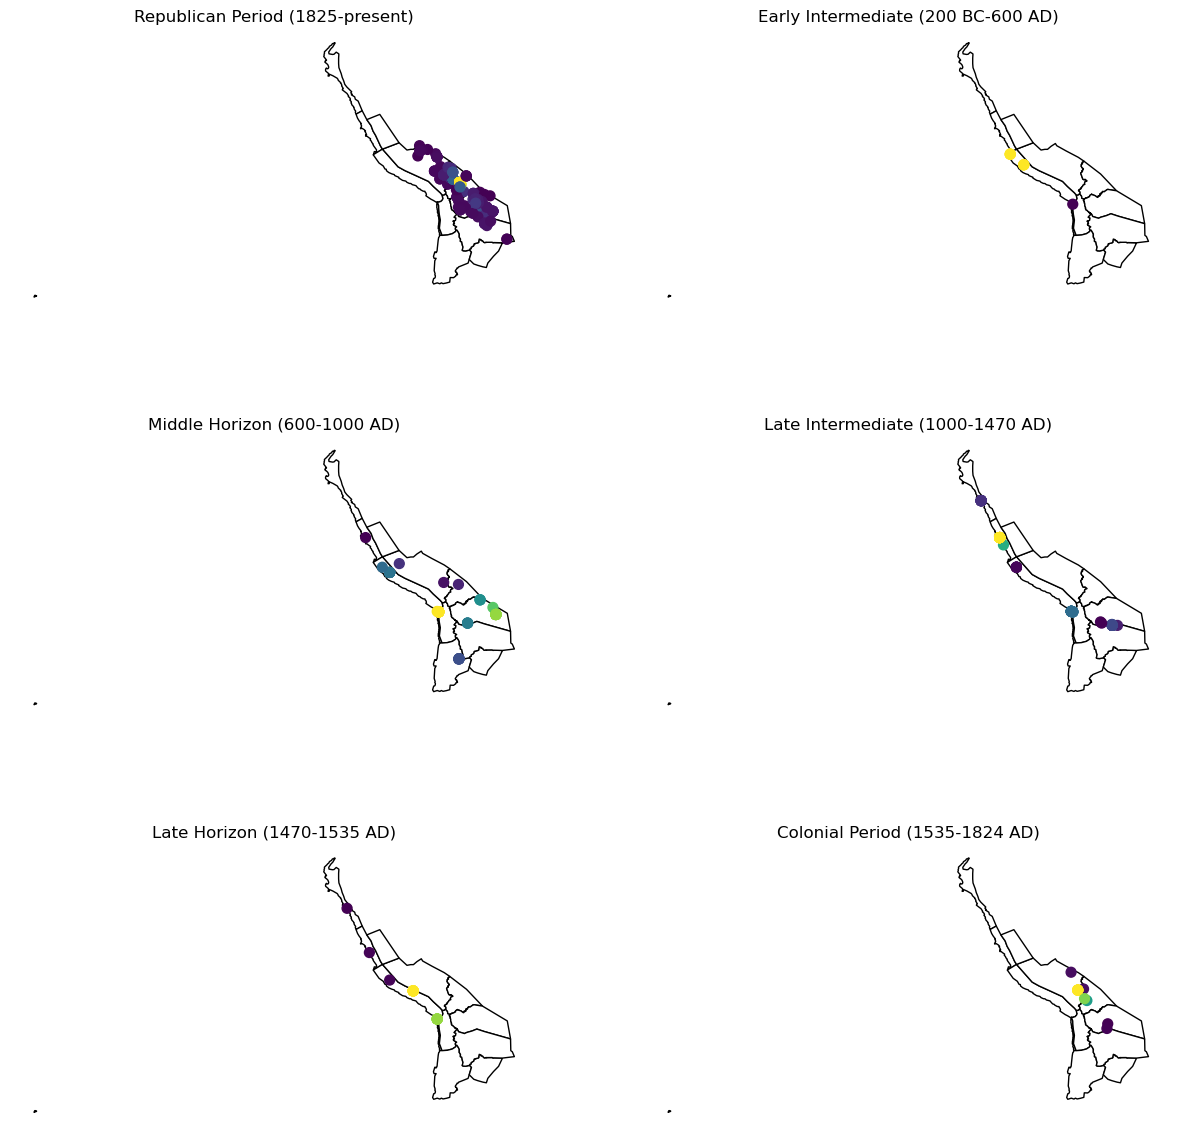

In [16]:
#Version diachronique
liste_period = []
for elt in gdf_places_prod["period"].unique() :
    liste_period.append(elt)
del liste_period[6]
del liste_period[6]
del liste_period[6]

fig, axs = plt.subplots(3,2, figsize = (15,15))
axs = axs.flatten()

for i in range(len(liste_period)) :
    gdf_places_prod_temp = gdf_places_prod[gdf_places_prod['period'] == f"{liste_period[i]}"]
    gdf_places_prod_temp = gdf_places_prod_temp[gdf_places_prod_temp['name'] != 'Rapa Nui']

    x = gdf_places_prod_temp.lon
    y = gdf_places_prod_temp.lat


    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    gdf_region["geometry"].to_crs(epsg=4326).plot(ax=axs[i], color = "white", edgecolor="black")
    axs[i].scatter(x, y, c=z, s=50)
    axs[i].set_title(f'{liste_period[i]}')
    axs[i].axis('off')

#### Densité des lieux de découverte

In [18]:
#Création du dataframe à partir duquel on va travailler
gdf_places_find['geometry']=geopandas.points_from_xy(gdf_places_find.lon, gdf_places_find.lat)
gdf_places_find['period']=df_textile['period']
gdf_places_find = geopandas.GeoDataFrame(gdf_places_find)

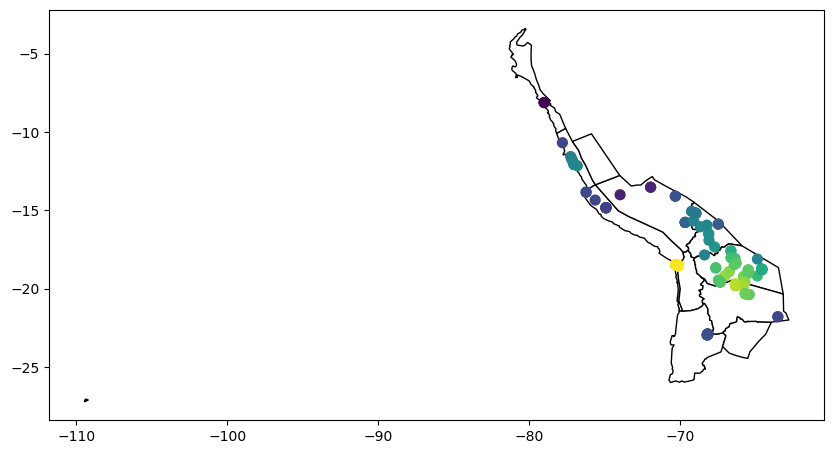

In [19]:
#Version synchronique
gdf_places_find_temp = gdf_places_find[gdf_places_find['name'] != 'Rapa Nui']
#print(gdf_places_find_temp)
x = gdf_places_find_temp.lon
y = gdf_places_find_temp.lat

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots(figsize = (10,10))
gdf_region["geometry"].to_crs(epsg=4326).plot(ax=ax, color = "white", edgecolor="black")
ax.scatter(x, y, c=z, s=50)

plt.show()

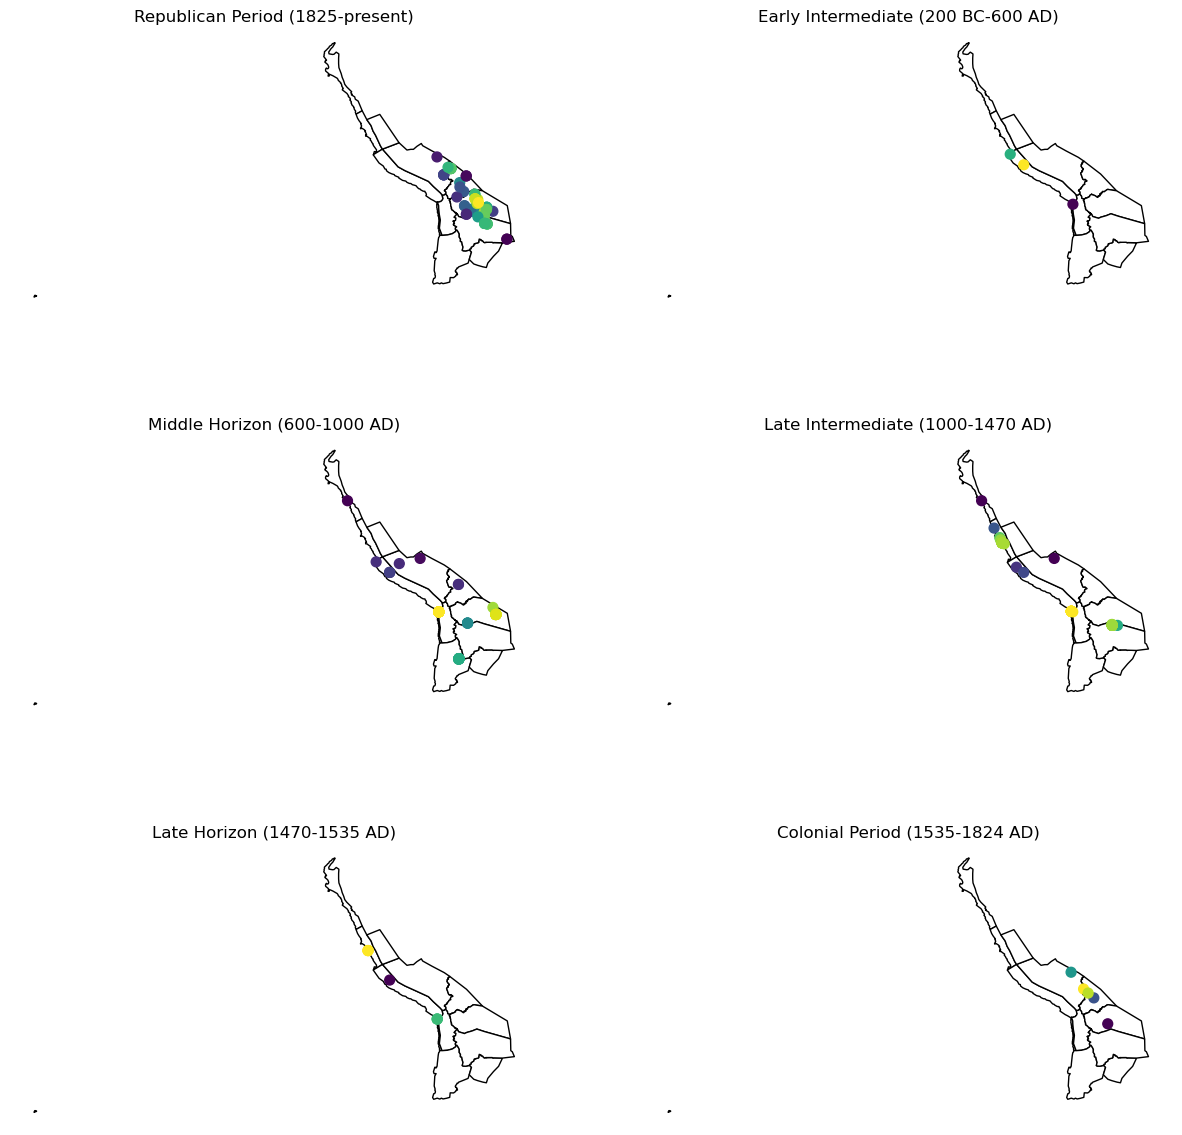

In [20]:
#Version diachronique
liste_period = []
for elt in gdf_places_find["period"].unique() :
    liste_period.append(elt)
del liste_period[6]
del liste_period[6]
del liste_period[6]

fig, axs = plt.subplots(3,2, figsize = (15,15))
axs = axs.flatten()

for i in range(len(liste_period)) :
    gdf_places_find_temp = gdf_places_find[gdf_places_find['period'] == f"{liste_period[i]}"]
    gdf_places_find_temp = gdf_places_find_temp[gdf_places_find_temp['name'] != 'Rapa Nui']

    x = gdf_places_find_temp.lon
    y = gdf_places_find_temp.lat


    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    gdf_region["geometry"].to_crs(epsg=4326).plot(ax=axs[i], color = "white", edgecolor="black")
    axs[i].scatter(x, y, c=z, s=50)
    axs[i].set_title(f'{liste_period[i]}')
    axs[i].axis('off')

# Calcul de distances

In [22]:
#Tableau qui récupère pour chaque textile le tuple (longitude, latitude) pour son lieu de production et son lieu de découverte
tab_lat_lon = pd.DataFrame()

lat_lon_prod_temp = gdf_places_prod[['ID','lat', 'lon']]
lat_lon_find_temp = gdf_places_find[['ID','lat', 'lon']]

tab_lat_lon = lat_lon_prod_temp.merge(lat_lon_find_temp, how='outer', on='ID')

#Vérifier que les x et les y sont bien prod et find
tab_lat_lon.rename(columns={"lat_x":"lat_prod","lon_x":"lon_prod", "lat_y":"lat_find", "lon_y":"lon_find"}, inplace = True)

tab_lat_lon

,ID,lat_prod,lon_prod,lat_find,lon_find
0,ILCA_ASU001,-19.220156,-65.822470,-19.220156,-65.822470
1,ILCA_ASU002,-20.368790,-65.465383,-20.368790,-65.465383
2,ILCA_ASU003,-20.368790,-65.465383,-20.368790,-65.465383
3,ILCA_ASU004,-19.220156,-65.822470,-19.220156,-65.822470
4,ILCA_ASU005,-18.806300,-65.511748,-18.806300,-65.511748
...,...,...,...,...,...
691,ILCA_VAM024,-27.128500,-109.336030,-12.062107,-77.036526
692,ILCA_VAM025,-12.249824,-76.906794,-12.062107,-77.036526
693,ILCA_VAM026,-27.128500,-109.336030,-12.062107,-77.036526
694,ILCA_VAM027,-13.835043,-76.249622,-27.128500,-109.336030


In [23]:
#Récupération des distances entre les lieux de production et les lieux de découverte
distance_list = []
  
# For each row in the column
for i in range(len(tab_lat_lon)):
    pt1 = []
    pt2 = []
    pt1.append(tab_lat_lon['lat_prod'][i])
    pt1.append(tab_lat_lon['lon_prod'][i])
    pt2.append(tab_lat_lon['lat_find'][i])
    pt2.append(tab_lat_lon['lon_find'][i])
    

    distance_2D= geodesic(pt1, pt2).km #.m pour avoir distance en mètre
    
    distance_list.append(distance_2D)
    
tab_lat_lon_dist = tab_lat_lon
    
tab_lat_lon_dist['distance'] = distance_list

tab_lat_lon_dist

#Passer à 0 les cas pour lesquels places = Rapa Nui

tab_lat_lon_dist['places_prod'] = gdf_places_prod['name']
tab_lat_lon_dist['places_find'] = gdf_places_find['name']

    
tab_lat_lon_dist.loc[tab_lat_lon_dist['places_prod'] == 'Rapa Nui', 'distance'] = np.nan  
tab_lat_lon_dist.loc[tab_lat_lon_dist['places_find'] == 'Rapa Nui', 'distance'] = np.nan

tab_lat_lon_dist

,ID,lat_prod,lon_prod,lat_find,lon_find,distance,places_prod,places_find
0,ILCA_ASU001,-19.220156,-65.822470,-19.220156,-65.822470,0.000000,Tinguipaya,Tinguipaya
1,ILCA_ASU002,-20.368790,-65.465383,-20.368790,-65.465383,0.000000,Calcha,Calcha
2,ILCA_ASU003,-20.368790,-65.465383,-20.368790,-65.465383,0.000000,Calcha,Calcha
3,ILCA_ASU004,-19.220156,-65.822470,-19.220156,-65.822470,0.000000,Tinguipaya,Tinguipaya
4,ILCA_ASU005,-18.806300,-65.511748,-18.806300,-65.511748,0.000000,Ravelo,Ravelo
...,...,...,...,...,...,...,...,...
691,ILCA_VAM024,-27.128500,-109.336030,-12.062107,-77.036526,NaN,Rapa Nui,Lima Metropolitana
692,ILCA_VAM025,-12.249824,-76.906794,-12.062107,-77.036526,25.111739,Zona Arqueológica Monumental Pachacámac,Lima Metropolitana
693,ILCA_VAM026,-27.128500,-109.336030,-12.062107,-77.036526,NaN,Rapa Nui,Lima Metropolitana
694,ILCA_VAM027,-13.835043,-76.249622,-27.128500,-109.336030,NaN,Paracas,Rapa Nui


In [25]:
tab_lat_lon_dist = tab_lat_lon_dist.fillna(0)

liste_ID = []
liste_distance = []
tab_dist_fin = pd.DataFrame()

for i in range(len(tab_lat_lon_dist['distance'])):
    if tab_lat_lon_dist['distance'][i] != 0 :
        liste_distance.append(tab_lat_lon_dist['distance'][i])
        liste_ID.append(tab_lat_lon_dist['ID'][i])


ID = pd.Series(liste_ID)
distance = pd.Series(liste_distance)

tab_dist_fin["ID"] = ID #75 cas de distances différentes entre lieu de production et lieu de découverte
tab_dist_fin["distance"] = distance

tab_dist_fin = tab_dist_fin.merge(df_textile, how='left', on='ID')
tab_dist_fin = tab_dist_fin.merge(tab_lat_lon, how='left', on='ID')
tab_dist_fin = tab_dist_fin.drop(columns=['description', 'image', 'motif attribute', 'scene', 'sequence', 
                                          'symmetry', 'size', 'usage', 'thread 4', 'thread 5', 'thread 6', 
                                         'direction of torsion', 'thread 2', 'thread 3', 'direction of warp',
                                         'motif', 'type of torsion', 'colour of the thread strands', 'thickness',
                                         'torsion of thread', 'colour', 'composition', 'thread 1', 'number of colour layers',
                                         'contrast', 'finish', 'product', 'component'])

tab_dist_fin = pd.DataFrame(tab_dist_fin)

tab_dist_fin

,ID,distance_x,period,repository,production site,find site,style,technique,structure,culture,material,fabric,lat_prod,lon_prod,lat_find,lon_find,distance_y,places_prod,places_find
0,ILCA_BML004,179.197514,Middle Horizon (600-1000 AD),"British Museum, website","Nasca, Peru, South coast","Paracas, Peru, South coast",Nasca-Huari (Late or Proliferous Nasca),"Oblique interlacing technique, Tubular technique","Complex tubular structure, Simple oblique inte...",Nasca-Huari (Late or Proliferous Nasca),Camelid fibre,"Oblique interlacing, Tubular, Warp-faced cloth",-14.827720,-74.937062,-13.835043,-76.249622,179.197514,Nasca,Paracas
1,ILCA_BML014,614.340042,Late Intermediate (1000-1470 AD),"British Museum, website","Central coast, Chancay, Peru","Cusco, Peru, South sierra",Chancay,Dovetailed technique,"Weft-faced structure, warped in 1 layer",Chancay,"Cotton fibre, cotton fiber Cotton thread",Weft-faced cloth,-11.562770,-77.269996,-13.517089,-71.978536,614.340042,Chancay,Cusco
2,ILCA_BML021,440.912977,Late Intermediate (1000-1470 AD),"British Museum, website","Central coast, Chancay, Peru","Nasca, Peru, South coast",Chancay,Weft figure,"Weft-faced structure, warped in 1 layer",Chancay,"Cotton fibre, cotton fiber Cotton thread",Weft-faced cloth,-11.562770,-77.269996,-14.827720,-74.937062,440.912977,Chancay,Nasca
3,ILCA_BML035,1497.438259,Middle Horizon (600-1000 AD),"British Museum, website","Arica Interior, Chile, San Miguel de Azapa","North coast, Peru, Trujillo",Maytas Chiribaya-Western Valleys Tradition,"Selected technique with basic odd count, 1|1, ...","Simple warp-faced structure, warped in 2 layers",Maytas-Chiribaya,Camelid fibre,Warp-faced cloth,-18.518347,-70.177182,-8.111678,-79.028774,1497.438259,San Miguel de Azapa,Trujillo
4,ILCA_BML036,25.531986,Late Intermediate (1000-1470 AD),"British Museum, website","Central coast, Chancay, Peru","Ancón, Central coast, Peru",Chancay,Weft figure,"Weft-faced structure, warped in 1 layer",Chancay,"Cotton fibre, cotton fiber Cotton thread","Warp-faced cloth, Weft-faced cloth",-11.562770,-77.269996,-11.773879,-77.175335,25.531986,Chancay,Ancón
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,ILCA_VAM012,93.823737,Middle Horizon (600-1000 AD),"Victoria and Albert Museum, website","Ica, Peru, South coast","Nasca, Peru, South coast",Nasca-Huari (Late or Proliferous Nasca),Plainweave technique,"Simple warp-faced structure, warped in 1 layer",Nasca-Huari (Late or Proliferous Nasca),Camelid fibre,Warp-faced cloth,-14.338611,-75.648333,-14.827720,-74.937062,93.823737,Ica,Nasca
70,ILCA_VAM018,315.887299,Late Intermediate (1000-1470 AD),"Victoria and Albert Museum, website","Chanchan, North coast, Peru","Central coast, Paramonga, Peru",Late Chimu,Interknotting technique,Interknotting structure,NaN,Camelid fibre,Interknotting,-8.105746,-79.074256,-10.675189,-77.818520,315.887299,Chan Chan,Paramonga
71,ILCA_VAM019,491.291992,Late Intermediate (1000-1470 AD),"Victoria and Albert Museum, website","Chanchan, North coast, Peru","Central coast, Lima, Peru",Chimu,Split tapestry technique - with long slits,"Weft-faced structure, warped in 1 layer",Chimu,"Cotton fibre, cotton fiber Cotton thread",Weft-faced cloth,-8.105746,-79.074256,-12.062107,-77.036526,491.291992,Chan Chan,Lima Metropolitana
72,ILCA_VAM020,60.815061,Late Intermediate (1000-1470 AD),"Victoria and Albert Museum, website","Central coast, Chancay, Peru","Central coast, Lima, Peru",Chancay,"Selected technique counted in pairs, 2|2, and ...","Simple warp-faced structure, warped in 2 layers",Chancay,"Cotton fibre, cotton fiber Cotton thread","Warp-faced cloth, Weft-faced cloth",-11.562770,-77.269996,-12.062107,-77.036526,60.815061,Chancay,Lima Metropolitana


In [26]:
#Description des données
tab_dist_fin.describe()
#74 cas avec des distances entre lieu de production et lieu de découverte (dont certaines sont égales à 0)

,distance_x,lat_prod,lon_prod,lat_find,lon_find,distance_y
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,121.692762,-16.895867,-71.261551,-17.414892,-71.144942,121.692762
std,245.340799,3.664453,3.741259,3.410821,3.455857,245.340799
min,0.350342,-22.910832,-79.074256,-22.952804,-79.028774,0.350342
25%,0.964976,-18.518347,-70.321139,-18.522524,-70.324026,0.964976
50%,1.513594,-18.478529,-70.249161,-18.472859,-70.238872,1.513594
75%,107.294851,-16.011252,-70.177182,-15.975359,-70.163533,107.294851
max,1497.438259,-8.105746,-65.191360,-8.111678,-63.555195,1497.438259


In [27]:
#On retire les distances inférieure à 6km pour améliorer la représentation graphique
tab_dist_fin = tab_dist_fin[tab_dist_fin.distance_x >= 6]
tab_dist_fin = tab_dist_fin.reset_index(drop=True)
tab_dist_fin

,ID,distance_x,period,repository,production site,find site,style,technique,structure,culture,material,fabric,lat_prod,lon_prod,lat_find,lon_find,distance_y,places_prod,places_find
0,ILCA_BML004,179.197514,Middle Horizon (600-1000 AD),"British Museum, website","Nasca, Peru, South coast","Paracas, Peru, South coast",Nasca-Huari (Late or Proliferous Nasca),"Oblique interlacing technique, Tubular technique","Complex tubular structure, Simple oblique inte...",Nasca-Huari (Late or Proliferous Nasca),Camelid fibre,"Oblique interlacing, Tubular, Warp-faced cloth",-14.827720,-74.937062,-13.835043,-76.249622,179.197514,Nasca,Paracas
1,ILCA_BML014,614.340042,Late Intermediate (1000-1470 AD),"British Museum, website","Central coast, Chancay, Peru","Cusco, Peru, South sierra",Chancay,Dovetailed technique,"Weft-faced structure, warped in 1 layer",Chancay,"Cotton fibre, cotton fiber Cotton thread",Weft-faced cloth,-11.562770,-77.269996,-13.517089,-71.978536,614.340042,Chancay,Cusco
2,ILCA_BML021,440.912977,Late Intermediate (1000-1470 AD),"British Museum, website","Central coast, Chancay, Peru","Nasca, Peru, South coast",Chancay,Weft figure,"Weft-faced structure, warped in 1 layer",Chancay,"Cotton fibre, cotton fiber Cotton thread",Weft-faced cloth,-11.562770,-77.269996,-14.827720,-74.937062,440.912977,Chancay,Nasca
3,ILCA_BML035,1497.438259,Middle Horizon (600-1000 AD),"British Museum, website","Arica Interior, Chile, San Miguel de Azapa","North coast, Peru, Trujillo",Maytas Chiribaya-Western Valleys Tradition,"Selected technique with basic odd count, 1|1, ...","Simple warp-faced structure, warped in 2 layers",Maytas-Chiribaya,Camelid fibre,Warp-faced cloth,-18.518347,-70.177182,-8.111678,-79.028774,1497.438259,San Miguel de Azapa,Trujillo
4,ILCA_BML036,25.531986,Late Intermediate (1000-1470 AD),"British Museum, website","Central coast, Chancay, Peru","Ancón, Central coast, Peru",Chancay,Weft figure,"Weft-faced structure, warped in 1 layer",Chancay,"Cotton fibre, cotton fiber Cotton thread","Warp-faced cloth, Weft-faced cloth",-11.562770,-77.269996,-11.773879,-77.175335,25.531986,Chancay,Ancón
5,ILCA_BML050,491.291992,Late Intermediate (1000-1470 AD),"British Museum, website","Chanchan, North coast, Peru","Central coast, Lima, Peru",Provincial Chimu,Loose balanced weave technique,"Balanced weave structure, warped in 1 layer",Chimu,"Cotton fibre, cotton fiber Cotton thread",Balanced weave,-8.105746,-79.074256,-12.062107,-77.036526,491.291992,Chan Chan,Lima Metropolitana
6,ILCA_BML059,80.487342,Late Intermediate (1000-1470 AD),"British Museum, website","Central coast, Chancay, Peru","Central coast, Peru, Tambo Inga",Chancay,Looping technique,Mesh structure with one element,Chancay,Probably alpaca,Mesh,-11.562770,-77.269996,-12.148417,-76.831659,80.487342,Chancay,Tambo Inga
7,ILCA_BML111,25.531986,Late Intermediate (1000-1470 AD),"British Museum, website","Central coast, Chancay, Peru","Ancón, Central coast, Peru",Chancay,Weft figure,"Weft-faced structure, warped in 1 layer",Chancay,"Cotton fibre, cotton fiber Cotton thread",Weft-faced cloth,-11.562770,-77.269996,-11.773879,-77.175335,25.531986,Chancay,Ancón
8,ILCA_BML136,23.301202,Republican Period (1825-present),"British Museum, website","Bolivia, Central Interandean Valleys, Ravelo","Bolivia, Central Interandean Valleys, Potolo",East Yampara,"Simple double cloth technique, with 2 wefts","Simple warp-faced structure, warped in 2 layers",Quechua-East Yampara,Probably llama,Warp-faced cloth,-18.806300,-65.511748,-19.015702,-65.534374,23.301202,Ravelo,Potolo
9,ILCA_BML137,215.080068,Republican Period (1825-present),"British Museum, website","Bolivia, Central Interandean Valleys, Leque","Bolivia, Central Interandean Valleys, Potolo",Chuis-Sora,"Complex double cloth technique, with 1 circula...","Complex warp-faced structure, warped in 3 layers",Quechua-Chuis-Sora,Wool fibre,Warp-faced cloth,-17.506269,-66.815320,-19.015702,-65.534374,215.080068,Leque,Potolo


/var/folders/nd/kkrd51cn61gfvcghmct5mznm0000gn/T/ipykernel_10671/2306009410.py:12: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  plot_point_prod_gdf['geometry'] = geopandas.points_from_xy(tab_dist_fin.lon_prod, tab_dist_fin.lat_prod)
/var/folders/nd/kkrd51cn61gfvcghmct5mznm0000gn/T/ipykernel_10671/2306009410.py:13: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame con

<Axes: >

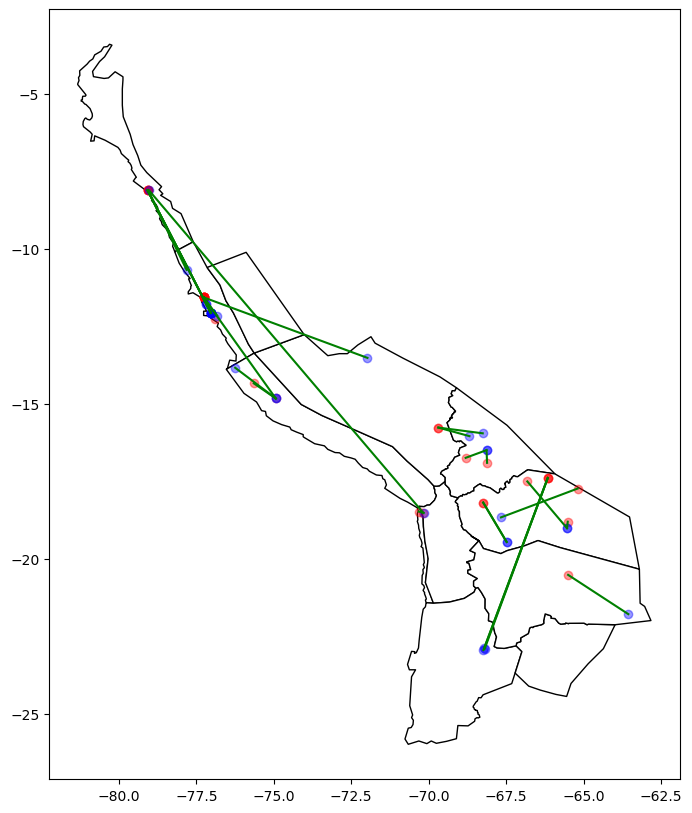

In [28]:
#Représentation graphique des distances
gdf_region = gdf_region[gdf_region.Name != 'Rapa Nui']

fig, ax = plt.subplots(figsize=(10, 10))

gdf_region["geometry"].plot(ax=ax, color = "white", edgecolor="black")


plot_point_prod_gdf = geopandas.GeoDataFrame() 
plot_point_find_gdf = geopandas.GeoDataFrame() 

plot_point_prod_gdf['geometry'] = geopandas.points_from_xy(tab_dist_fin.lon_prod, tab_dist_fin.lat_prod)
plot_point_find_gdf['geometry'] = geopandas.points_from_xy(tab_dist_fin.lon_find, tab_dist_fin.lat_find)



for i in range(len(tab_dist_fin)-1) :
    pt_prod = [tab_dist_fin['lon_prod'][i],tab_dist_fin['lat_prod'][i]]
    pt_find = [tab_dist_fin['lon_find'][i],tab_dist_fin['lat_find'][i]]
    
    x_values = [pt_prod[0], pt_find[0]]
    y_values = [pt_prod[1], pt_find[1]]
    
    plt.plot(x_values, y_values, color="green")

plot_point_prod_gdf.plot(ax=ax, color="red", alpha = 0.4)
plot_point_find_gdf.plot(ax=ax, color="blue", alpha = 0.4)

### Récupération des dataframes contenant le nom des lieux et la distance qui les sépare

#### Cas lieux de production

In [29]:
points_prod_gdf = geopandas.GeoDataFrame(tab_lat_lon.drop(columns=['lat_prod', 'lon_prod']))
points_prod_gdf['geometry'] = geopandas.points_from_xy(tab_lat_lon.lon_prod, tab_lat_lon.lat_prod)

points_prod_gdf

/var/folders/nd/kkrd51cn61gfvcghmct5mznm0000gn/T/ipykernel_10671/2415311909.py:2: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  points_prod_gdf['geometry'] = geopandas.points_from_xy(tab_lat_lon.lon_prod, tab_lat_lon.lat_prod)


,ID,lat_find,lon_find,distance,places_prod,places_find,geometry
0,ILCA_ASU001,-19.220156,-65.822470,0.000000,Tinguipaya,Tinguipaya,POINT (-65.82247 -19.22016)
1,ILCA_ASU002,-20.368790,-65.465383,0.000000,Calcha,Calcha,POINT (-65.46538 -20.36879)
2,ILCA_ASU003,-20.368790,-65.465383,0.000000,Calcha,Calcha,POINT (-65.46538 -20.36879)
3,ILCA_ASU004,-19.220156,-65.822470,0.000000,Tinguipaya,Tinguipaya,POINT (-65.82247 -19.22016)
4,ILCA_ASU005,-18.806300,-65.511748,0.000000,Ravelo,Ravelo,POINT (-65.51175 -18.80630)
...,...,...,...,...,...,...,...
691,ILCA_VAM024,-12.062107,-77.036526,NaN,Rapa Nui,Lima Metropolitana,POINT (-109.33603 -27.12850)
692,ILCA_VAM025,-12.062107,-77.036526,25.111739,Zona Arqueológica Monumental Pachacámac,Lima Metropolitana,POINT (-76.90679 -12.24982)
693,ILCA_VAM026,-12.062107,-77.036526,NaN,Rapa Nui,Lima Metropolitana,POINT (-109.33603 -27.12850)
694,ILCA_VAM027,-27.128500,-109.336030,NaN,Paracas,Rapa Nui,POINT (-76.24962 -13.83504)


#### Cas lieux de découverte

In [30]:
points_find_gdf = geopandas.GeoDataFrame(tab_lat_lon.drop(columns=['lat_find', 'lon_find']))
points_find_gdf['geometry'] = geopandas.points_from_xy(tab_lat_lon.lon_find, tab_lat_lon.lat_find)
points_find_gdf

/var/folders/nd/kkrd51cn61gfvcghmct5mznm0000gn/T/ipykernel_10671/2674518786.py:2: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  points_find_gdf['geometry'] = geopandas.points_from_xy(tab_lat_lon.lon_find, tab_lat_lon.lat_find)


,ID,lat_prod,lon_prod,distance,places_prod,places_find,geometry
0,ILCA_ASU001,-19.220156,-65.822470,0.000000,Tinguipaya,Tinguipaya,POINT (-65.82247 -19.22016)
1,ILCA_ASU002,-20.368790,-65.465383,0.000000,Calcha,Calcha,POINT (-65.46538 -20.36879)
2,ILCA_ASU003,-20.368790,-65.465383,0.000000,Calcha,Calcha,POINT (-65.46538 -20.36879)
3,ILCA_ASU004,-19.220156,-65.822470,0.000000,Tinguipaya,Tinguipaya,POINT (-65.82247 -19.22016)
4,ILCA_ASU005,-18.806300,-65.511748,0.000000,Ravelo,Ravelo,POINT (-65.51175 -18.80630)
...,...,...,...,...,...,...,...
691,ILCA_VAM024,-27.128500,-109.336030,NaN,Rapa Nui,Lima Metropolitana,POINT (-77.03653 -12.06211)
692,ILCA_VAM025,-12.249824,-76.906794,25.111739,Zona Arqueológica Monumental Pachacámac,Lima Metropolitana,POINT (-77.03653 -12.06211)
693,ILCA_VAM026,-27.128500,-109.336030,NaN,Rapa Nui,Lima Metropolitana,POINT (-77.03653 -12.06211)
694,ILCA_VAM027,-13.835043,-76.249622,NaN,Paracas,Rapa Nui,POINT (-109.33603 -27.12850)
